<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/Copy_of_loan_stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [3]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())


In [4]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['Gender']=oe.fit_transform(df[['Gender']])
df['Married']=oe.fit_transform(df[['Married']])
df['Education']=oe.fit_transform(df[['Education']])
df['Self_Employed']=oe.fit_transform(df[['Self_Employed']])
df['Property_Area']=oe.fit_transform(df[['Property_Area']])
df['Loan_Status']=oe.fit_transform(df[['Loan_Status']])


In [5]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = df['Dependents'].astype(int)

In [ ]:
# df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
# df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
# df['BalanceIncome'] = df['TotalIncome'] - df['EMI']
# df['IncomeLoanRatio'] = df['TotalIncome'] / df['LoanAmount']
# df['TotalIncome_log'] = np.log1p(df['TotalIncome'])
# df['IncomeBin'] = pd.cut(df['TotalIncome'], bins=[0, 2500, 4000, 6000, 10000, np.inf], labels=[0,1,2,3,4])

In [6]:
scaler = StandardScaler()
df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = scaler.fit_transform(
    df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0.0,0.0,5849,0.0,0.000000,0.279851,0.45164,2.0,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583,1508.0,-0.219273,0.279851,0.45164,0.0,0.0
2,LP001005,1.0,1.0,0,0.0,1.0,3000,0.0,-0.957641,0.279851,0.45164,2.0,1.0
3,LP001006,1.0,1.0,0,1.0,0.0,2583,2358.0,-0.314547,0.279851,0.45164,2.0,1.0
4,LP001008,1.0,0.0,0,0.0,0.0,6000,0.0,-0.064454,0.279851,0.45164,2.0,1.0


In [8]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [9]:
x=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

In [10]:
for col in x[['ApplicantIncome','CoapplicantIncome']]:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x[col] = np.where(x[col] < lower, lower,
                      np.where(x[col] > upper, upper, x[col]))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [13]:
y_train_resampled.value_counts()

,count
Loan_Status,
0.0,302
1.0,302


<Axes: >

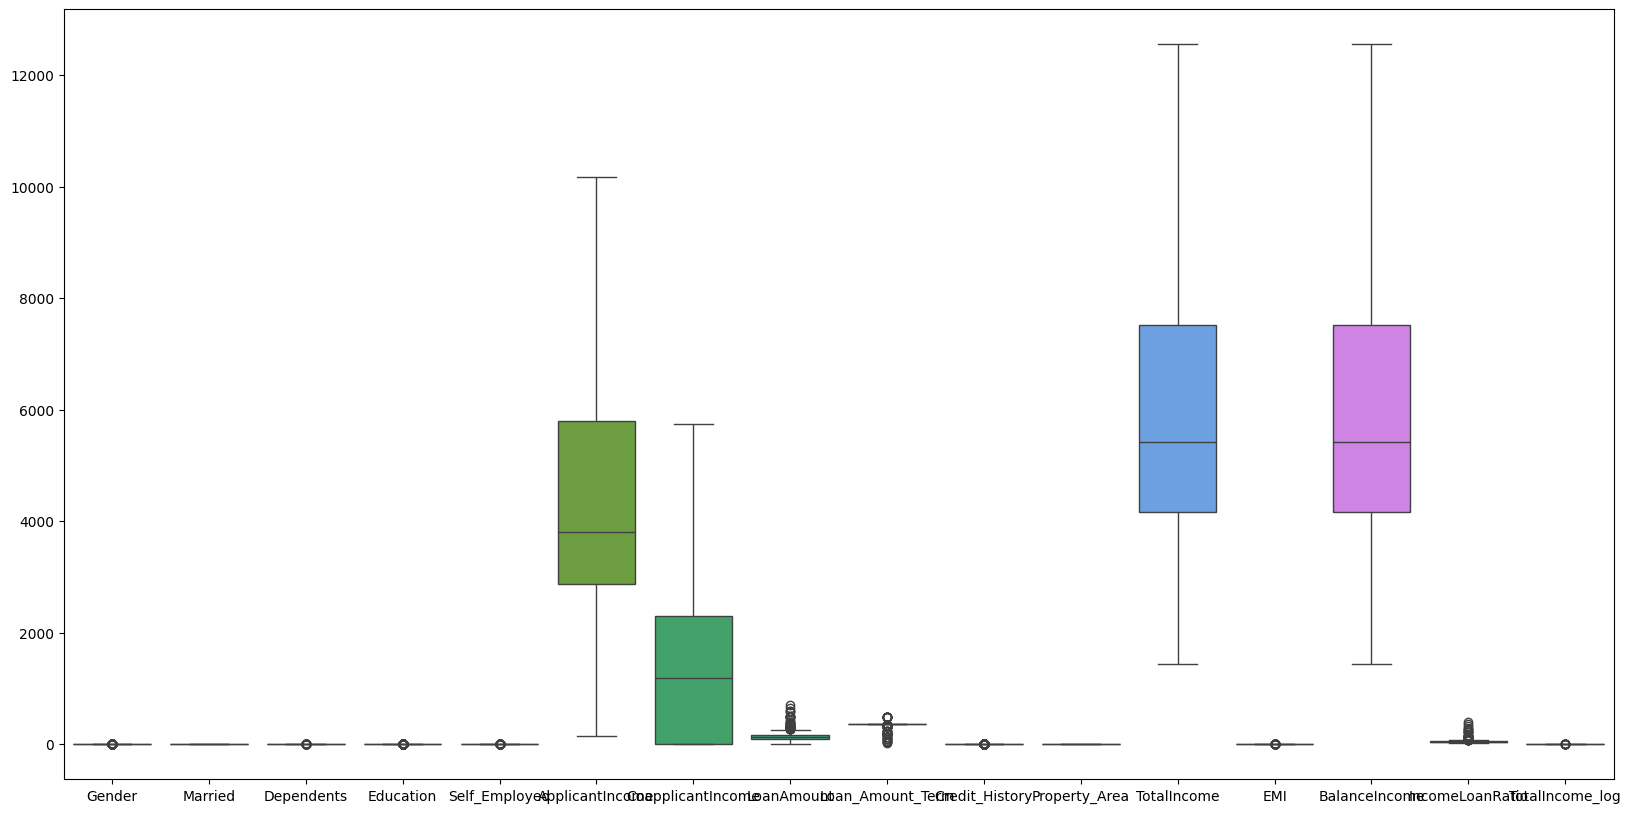

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=x, ax=ax)

In [14]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train_resampled)
x_test_norm = scaler.transform(x_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(x_train_norm, y_train_resampled)

RandomForestClassifier(class_weight='balanced')

In [16]:
y_pred=rf.predict(x_test_norm)

In [17]:
accuracy_score(y_test,y_pred)

0.7513513513513513

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

In [19]:
param_dist = {
    'n_estimators': [10,15,30,50,80],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, 1.0],  # Use valid options for max_features
    'ccp_alpha': [0.0, 0.01, 0.1]
}
# rf = RandomForestRegressor(random_state=42)

In [20]:
# rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                 # Try 30 random combinations
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1                  # Use all cores
)

In [21]:
random_search.fit(x_train_norm, y_train_resampled)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.1],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         1.0],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [10, 15, 30, 50, 80]},
                   random_state=42, scoring='accuracy', verbose=2)

In [22]:
best_est = random_search.best_estimator_

In [23]:
y_pred1 = best_est.predict(x_test_norm)
print(accuracy_score(y_test, y_pred1))

0.7405405405405405


In [ ]:
threshold = 0.35  # Try values from 0.3 to 0.5
y_pred_thresh = (y_pred >= threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

         0.0       0.76      0.52      0.62        65
         1.0       0.78      0.91      0.84       120

    accuracy                           0.77       185
   macro avg       0.77      0.72      0.73       185
weighted avg       0.77      0.77      0.76       185



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"]))


Classification Report:
              precision    recall  f1-score   support

Not Approved       0.76      0.52      0.62        65
    Approved       0.78      0.91      0.84       120

    accuracy                           0.77       185
   macro avg       0.77      0.72      0.73       185
weighted avg       0.77      0.77      0.76       185



In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the KNN model on the scaled training data
knn.fit(x_train_norm, y_train_resampled)

KNeighborsClassifier()

In [25]:
y_pred1=knn.predict(x_test_norm)

In [26]:
accuracy_score(y_test,y_pred1)

0.7027027027027027

In [43]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_norm, y_train_resampled)

SVC()

In [45]:
y_pred2=svm.predict(x_test_norm)

In [46]:
accuracy_score(y_test,y_pred)

0.7513513513513513

In [51]:

param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'degree': [2, 3, 4]
}

In [52]:
random_search = RandomizedSearchCV(
    estimator=svm,                   # SVC() or SVR()
    param_distributions=param_dist,    # model-specific
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [53]:
random_search.fit(x_train_norm, y_train_resampled)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.01, 0.1],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   random_state=42, verbose=2)

In [54]:
best_svm=random_search.best_estimator_

In [55]:
y_pred2=best_svm.predict(x_test_norm)
accuracy_score(y_test,y_pred2)

0.745945945945946

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
gd.fit(x_train_norm,y_train_resampled)

GradientBoostingClassifier()

In [28]:
y_pred3=gd.predict(x_test_norm)

In [29]:
accuracy_score(y_test,y_pred3)

0.745945945945946

In [30]:
param_dist = {
    'n_estimators': [10,30,50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

In [31]:
random_search = RandomizedSearchCV(
    estimator=gd,
    param_distributions=param_dist,
    n_iter=30,                # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [32]:
random_search.fit(x_train_norm, y_train_resampled)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 30, 50, 100],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [35]:
best_gd=random_search.best_estimator_

In [36]:
y_pred4=best_gd.predict(x_test_norm)
accuracy_score(y_test,y_pred4)

0.7837837837837838

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("\nClassification Report:")
print(classification_report(y_test, y_pred3, target_names=["Not Approved", "Approved"]))


Classification Report:
              precision    recall  f1-score   support

Not Approved       0.74      0.49      0.59        65
    Approved       0.77      0.91      0.83       120

    accuracy                           0.76       185
   macro avg       0.76      0.70      0.71       185
weighted avg       0.76      0.76      0.75       185



In [56]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import StackingClassifier
meta_learner = LogisticRegressionCV (cv=5)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', best_est),
        ('gd', best_gd),
        ('knn', knn),
        ('svm', best_svm)
    ],
    final_estimator=meta_learner,
    passthrough=True,
    cv=5
)

In [57]:
stacking_clf.fit(x_train_norm, y_train_resampled)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=30,
                                                       max_features=1.0,
                                                       min_samples_leaf=4,
                                                       n_estimators=80)),
                               ('gd',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=6,
                                                           max_features='log2',
                                                           min_samples_leaf=2,
                                                           min_samples_split=4,
                                                           subsample=0.6)),
                               ('knn', KNeighborsClassifier()),
                               ('svm', SVC(C=10, degree=2, gamma=0.1))],
                   final_estimator=LogisticRegressionCV(cv=5),
                   passthrough=True)

In [58]:
y_pred4=stacking_clf.predict(x_test_norm)

In [59]:
accuracy_score(y_test,y_pred4)

0.7513513513513513

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("\nClassification Report:")
print(classification_report(y_test, y_pred4, target_names=["Not Approved", "Approved"]))


Classification Report:
              precision    recall  f1-score   support

Not Approved       0.74      0.45      0.56        65
    Approved       0.75      0.92      0.83       120

    accuracy                           0.75       185
   macro avg       0.75      0.68      0.69       185
weighted avg       0.75      0.75      0.73       185



In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gd)
    ],
    voting='soft'
)
voting_clf.fit(x_train_norm, y_train_resampled)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [ ]:
y_pred5=voting_clf.predict(x_test_norm)

In [ ]:
accuracy_score(y_test,y_pred5)

0.7675675675675676

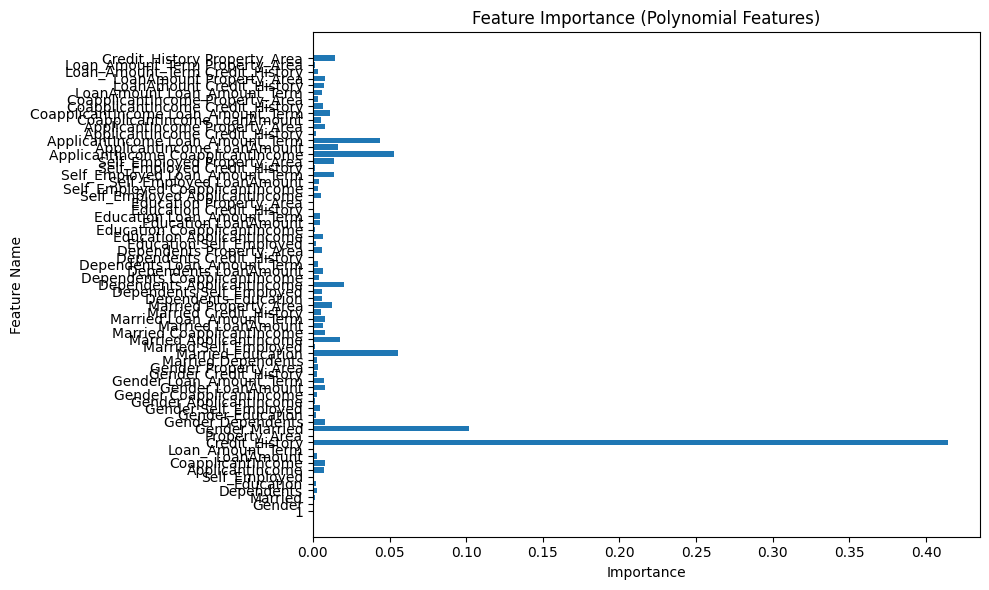

In [ ]:
plt.figure(figsize=(10,6))
poly_feature_names = poly.get_feature_names_out(input_features=x.columns)
plt.barh(poly_feature_names, gd.feature_importances_)
plt.title("Feature Importance (Polynomial Features)")
plt.xlabel("Importance") # Add an x-axis label for clarity
plt.ylabel("Feature Name") # Add a y-axis label for clarity
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Compare predictions between your two best models
kappa = cohen_kappa_score(y_pred, y_pred3)
print(f"Agreement between RF and GB: {kappa:.2f}")
# Values close to 1 mean models agree too much

Agreement between RF and GB: 0.85
